In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [27]:
df = pd.read_csv('Dataset-4.csv') 

In [28]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,01/01/2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01/01/2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01/01/2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01/01/2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01/01/2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [38]:
dataset = df.drop('DateTime', axis=1)
dataset

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [39]:
columns = dataset.iloc[0]
columns


Temperature                      6.55900
Humidity                        73.80000
Wind Speed                       0.08300
general diffuse flows            0.05100
diffuse flows                    0.11900
Zone 1 Power Consumption     34055.69620
Zone 2  Power Consumption    16128.87538
Zone 3  Power Consumption    20240.96386
Name: 0, dtype: float64

In [40]:
# split the data into inputs and outputs

X = dataset.iloc[:, : -1].values     #all the columns except the last column, dropping the last columm
y = np.array(dataset.iloc[:, -1].values)    #droping all the columns and taking the last column as output 

In [41]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [42]:
X_train

array([[1.84800000e+01, 7.47000000e+01, 7.30000000e-02, ...,
        1.04000000e-01, 3.72194311e+04, 2.19958506e+04],
       [1.55600000e+01, 5.73100000e+01, 8.40000000e-02, ...,
        1.49800000e+02, 2.82264407e+04, 1.52425532e+04],
       [1.23800000e+01, 8.67000000e+01, 4.91500000e+00, ...,
        1.41000000e-01, 2.06092308e+04, 1.46082645e+04],
       ...,
       [2.29800000e+01, 5.00500000e+01, 4.92200000e+00, ...,
        1.00000000e-01, 3.30945133e+04, 1.86548857e+04],
       [1.23700000e+01, 7.64000000e+01, 8.50000000e-02, ...,
        1.19000000e-01, 3.20020253e+04, 2.09142857e+04],
       [1.64400000e+01, 8.46000000e+01, 7.20000000e-02, ...,
        4.45500000e+01, 2.55200861e+04, 2.86167006e+04]])

In [43]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [46]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [48]:
np.mean(mse)

-15671701.496522848

In [49]:
##prediction 
reg_pred=regression.predict(X_test)

In [50]:
reg_pred


array([16151.82917337, 17177.97187917, 12399.05448381, ...,
       15692.46061485, 19403.65631633, 12328.63341859])

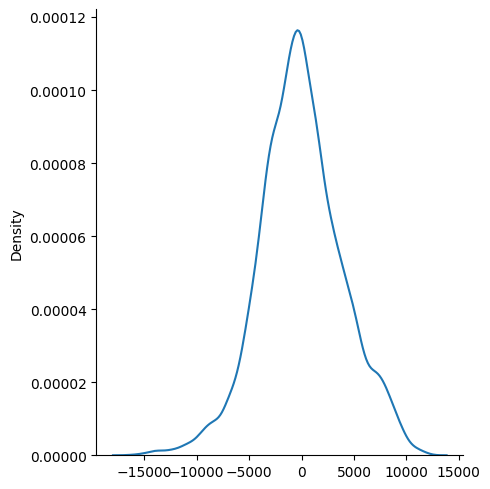

In [51]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [52]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.44880825468767127

In [53]:
from sklearn.metrics import mean_squared_error, mean_squared_error
from sklearn.metrics import mean_absolute_error
# Assuming y_train and y_pred are the train and predicted labels, respectively
MSE = mean_squared_error(y_test, reg_pred)
RMSE = mean_squared_error(y_test, reg_pred, squared=False)
MAE = mean_absolute_error(y_test, reg_pred)

In [54]:
MSE, RMSE, MAE

(15624193.091936003, 3952.7450071989215, 3064.7109363200257)

# accuracy_score and Multiple regrression 
Accuracy score is generally used to evaluate the performance of a classification model, where the predicted outputs are categorical. For continuous data, accuracy score might not be the most appropriate measure to use.

If we have continuous data and a corresponding set of true continuous values, we can use various measures to evaluate the performance of a model that predicts continuous values. Some common measures used for regression models are:

Mean Squared Error (MSE): calculates the average squared difference between the predicted and true values.

Root Mean Squared Error (RMSE): calculates the square root of the MSE, which gives an estimate of the average distance between the predicted and true values.

Mean Absolute Error (MAE): calculates the average absolute difference between the predicted and true values.

R-squared (R²): measures the proportion of variation in the dependent variable that is explained by the independent variables.

These measures can provide a better evaluation of the performance of a model that predicts continuous values than accuracy score.

In [24]:
# # importing the accuracy score
# from sklearn.metrics import accuracy_score
# # accuracy
# print(accuracy_score(y_test, reg_pred))
# from sklearn.metrics import classification_report
# print(classification_report(y_test, reg_pred))
